In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset and summarize

In [2]:
df = pd.read_csv("data.csv")
df.head()

Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0   0.000000   0.000000   0.000000  ...   0  0  0  0   0   0   0   0   0   0  
1 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [4]:
df.describe()

Class          User            X0            Y0            Z0  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean       2.983738      7.959127     50.345664     85.812051    -29.984712   
std        1.421183      4.697810     32.696173     40.204363     34.361918   
min        0.000000      0.000000   -108.552738    -98.233756   -126.770872   
25%        2.000000      5.000000     29.295062     63.494432    -56.356438   
50%        3.000000      9.000000     54.619964     86.526246    -30.864125   
75%        4.000000     12.000000     72.488686    113.107355     -1.418803   
max        5.000000     14.000000    190.017835    169.175464    113.345119   

                 X1            Y1            Z1            X2            Y2  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean      49.595209     86.192647    -29.509202     48.612121     83.771315   
std       32.478238     40.453214     34.764398     33.605390     41.023543   
min     -111.685241    -96.142589   -166.006838   -106.886524   -100.789312   
25%       28.755137     64.154529    -57.360107     25.170006     58.052385   
50%       54.215514     87.542751    -30.184005     53.814580     86.458324   
75%       71.762039    116.219398     -0.366692     71.561951    106.660827   
max      188.691997    170.209350    104.697852    188.760168    168.186466   

                 Z2  
count  78096.000000  
mean     -30.560515  
std       35.120329  
min     -129.595296  
25%      -58.654059  
50%      -32.352414  
75%       -0.944786  
max      104.590879

### Data Preprocess

##### No need to keep user_id lets drop it

In [5]:
df = df.drop("User",axis=1)

In [6]:
## converting to float

df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

#### Checking null values

In [7]:
df.isnull().sum() 

Class        0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

###  As we can see now we have lots of nulls especially for X11,Y11,Z11 almost all of them are nulls

In [8]:
# Get a boolean mask indicating which columns contain more than 30% null values
mask = df.isnull().sum() / len(df) > 0.3

# Drop columns that contain more than 30% null values
df = df.drop(columns=df.columns[mask], axis=1)

### I dropped a column if it involves more than 30 percent null values which I dont think we need to keep it later on I might change this threshold value

In [9]:
df.isnull().sum()

Class        0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
dtype: int64

In [10]:
## converting to float

df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   X0      78096 non-null  float64
 2   Y0      78096 non-null  float64
 3   Z0      78096 non-null  float64
 4   X1      78096 non-null  float64
 5   Y1      78096 non-null  float64
 6   Z1      78096 non-null  float64
 7   X2      78096 non-null  float64
 8   Y2      78096 non-null  float64
 9   Z2      78096 non-null  float64
 10  X3      77406 non-null  float64
 11  Y3      77406 non-null  float64
 12  Z3      77406 non-null  float64
 13  X4      74976 non-null  float64
 14  Y4      74976 non-null  float64
 15  Z4      74976 non-null  float64
 16  X5      65073 non-null  float64
 17  Y5      65073 non-null  float64
 18  Z5      65073 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 11.3 MB


### I decided to fill null values with median values

In [12]:
df.fillna(df.median(),inplace=True)
df.isnull().sum()

Class    0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
dtype: int64

In [13]:
df.head()

Class         X0         Y0         Z0         X1         Y1         Z1  \
0      0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1  54.263880  71.466776 -64.807709  76.895635  42.462500 -72.780545   
2      1  56.527558  72.266609 -61.935252  39.135978  82.538530 -49.596509   
3      1  55.849928  72.469064 -62.562788  37.988804  82.631347 -50.606259   
4      1  55.329647  71.707275 -63.688956  36.561863  81.868749 -52.752784   

          X2         Y2         Z2         X3         Y3         Z3  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1  36.621229  81.680557 -52.919272  85.232264  67.749220 -73.684130   
2  79.223743  43.254091 -69.982489  87.450873  68.400808 -70.703991   
3  78.451526  43.567403 -70.658489  86.835388  68.907925 -71.138344   
4  86.320630  68.214645 -72.228461  61.596157  11.250648 -68.956425   

          X4         Y4         Z4         X5         Y5         Z5  
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
1  59.188576  10.678936 -71.297781  51.950619  88.136398 -31.714323  
2  61.587452  11.779919 -68.827418  51.950619  88.136398 -31.714323  
3  61.686427  11.793440 -68.889316  51.950619  88.136398 -31.714323  
4  77.387225  42.717833 -72.015146  51.950619  88.136398 -31.714323

### Lets visualize boxplots to understand more about data

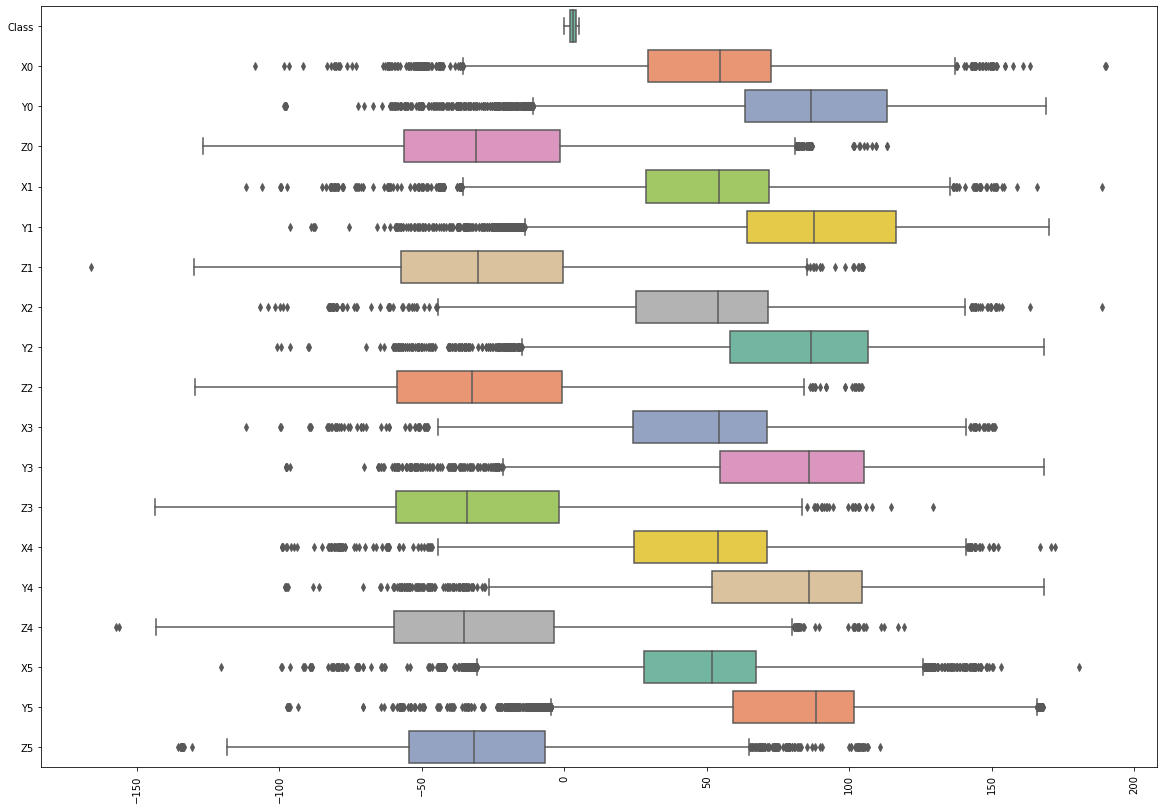

In [14]:
plt.figure(figsize=(20,14))
sns.boxplot(data=df,orient="h", palette="Set2")
plt.xticks(rotation=90);

### So we have 14 users 

In [16]:
df["Class"].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
0        1
Name: Class, dtype: int64

###  We have 6 classes, while most of them distrbuted good class 0 has only 1 example lets see that

In [17]:
df[df["Class"]==0]

Class   X0   Y0   Z0   X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4  \
0      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Y4   Z4   X5   Y5   Z5  
0  0.0  0.0  0.0  0.0  0.0

###  This looks like this class is just garbage we can delete it
### Now we have 5 equally balanced classes we can continue

In [18]:
df = df.iloc[1:,:]
df.head()

Class         X0         Y0         Z0         X1         Y1         Z1  \
1      1  54.263880  71.466776 -64.807709  76.895635  42.462500 -72.780545   
2      1  56.527558  72.266609 -61.935252  39.135978  82.538530 -49.596509   
3      1  55.849928  72.469064 -62.562788  37.988804  82.631347 -50.606259   
4      1  55.329647  71.707275 -63.688956  36.561863  81.868749 -52.752784   
5      1  55.142401  71.435607 -64.177303  36.175818  81.556874 -53.475747   

          X2         Y2         Z2         X3         Y3         Z3  \
1  36.621229  81.680557 -52.919272  85.232264  67.749220 -73.684130   
2  79.223743  43.254091 -69.982489  87.450873  68.400808 -70.703991   
3  78.451526  43.567403 -70.658489  86.835388  68.907925 -71.138344   
4  86.320630  68.214645 -72.228461  61.596157  11.250648 -68.956425   
5  76.986143  42.426849 -72.574743  86.368748  67.901260 -72.444650   

          X4         Y4         Z4         X5         Y5         Z5  
1  59.188576  10.678936 -71.297781  51.950619  88.136398 -31.714323  
2  61.587452  11.779919 -68.827418  51.950619  88.136398 -31.714323  
3  61.686427  11.793440 -68.889316  51.950619  88.136398 -31.714323  
4  77.387225  42.717833 -72.015146  51.950619  88.136398 -31.714323  
5  61.275402  10.841109 -69.279906  51.950619  88.136398 -31.714323

### We will use all numerical features such as (X1,X2,Y1,Z1...etc) too classify classes.

### Now lets get rid of outliers

In [19]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 

IQR = Q3 - Q1  

In [20]:
df.columns[2:]

Index(['Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4',
       'Y4', 'Z4', 'X5', 'Y5', 'Z5'],
      dtype='object')

In [24]:
cols = df.columns[1:] ## Not including "user","class"
df_out = df[~((df[cols] < (Q1 - 1.5* IQR)) |(df[cols] > (Q3 + 1.5* IQR))).any(axis=1)]
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75095 entries, 1 to 78095
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   75095 non-null  int64  
 1   X0      75095 non-null  float64
 2   Y0      75095 non-null  float64
 3   Z0      75095 non-null  float64
 4   X1      75095 non-null  float64
 5   Y1      75095 non-null  float64
 6   Z1      75095 non-null  float64
 7   X2      75095 non-null  float64
 8   Y2      75095 non-null  float64
 9   Z2      75095 non-null  float64
 10  X3      75095 non-null  float64
 11  Y3      75095 non-null  float64
 12  Z3      75095 non-null  float64
 13  X4      75095 non-null  float64
 14  Y4      75095 non-null  float64
 15  Z4      75095 non-null  float64
 16  X5      75095 non-null  float64
 17  Y5      75095 non-null  float64
 18  Z5      75095 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 11.5 MB


C:\Users\user\AppData\Local\Temp\ipykernel_2052\1423995310.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df[cols] < (Q1 - 1.5* IQR)) |(df[cols] > (Q3 + 1.5* IQR))).any(axis=1)]


In [25]:
df_out.describe()

Class            X0            Y0            Z0            X1  \
count  75095.000000  75095.000000  75095.000000  75095.000000  75095.000000   
mean       2.985805     50.272044     86.606996    -30.026677     49.398650   
std        1.424098     32.182547     39.499438     33.855277     32.066747   
min        1.000000    -35.478506    -10.888550   -120.284665    -35.696646   
25%        2.000000     29.351522     64.673409    -56.309610     28.760331   
50%        3.000000     54.424945     86.956225    -30.651708     53.940083   
75%        4.000000     72.127467    115.696819     -1.243224     71.429175   
max        5.000000    137.234796    169.175464     80.785994    135.499506   

                 Y1            Z1            X2            Y2            Z2  \
count  75095.000000  75095.000000  75095.000000  75095.000000  75095.000000   
mean      86.913133    -29.437037     48.369304     84.482528    -30.466064   
std       39.811178     34.372108     33.300603     40.448872     34.730784   
min      -13.867538   -120.290858    -44.211785    -14.836558   -121.106421   
25%       65.298262    -57.174174     24.873295     59.244832    -58.420244   
50%       87.942462    -29.941288     53.594043     86.836120    -32.147413   
75%      118.075787     -0.181903     71.285056    107.573485     -0.724826   
max      170.209350     84.353953    140.267453    168.186466     84.266451   

                 X3            Y3            Z3            X4            Y4  \
count  75095.000000  75095.000000  75095.000000  75095.000000  75095.000000   
mean      48.365697     82.719605    -31.083701     48.496852     81.192843   
std       33.423498     40.918581     35.391121     33.167094     41.359506   
min      -44.485470    -21.083339   -129.386901    -44.483679    -26.403166   
25%       24.091218     55.367527    -59.008163     24.324115     52.398273   
50%       54.136412     85.767143    -34.013680     53.856520     85.777385   
75%       70.923378    105.501649     -1.525477     70.864811    104.549086   
max      141.053634    168.292018     82.314970    140.789015    168.258643   

                 Z4            X5            Y5            Z5  
count  75095.000000  75095.000000  75095.000000  75095.000000  
mean     -32.099755     47.796506     84.118798    -30.301332  
std       35.289246     31.055130     37.604767     33.105180  
min     -116.727199    -30.787533     -4.759390   -118.328399  
25%      -59.592537     27.873787     63.265601    -53.690785  
50%      -35.165047     51.950619     88.136398    -31.714323  
75%       -3.587077     67.273321    102.282035     -6.559670  
max       79.898632    126.026272    165.692335     64.753507

### Lets visualize our cleaned data

<AxesSubplot:>

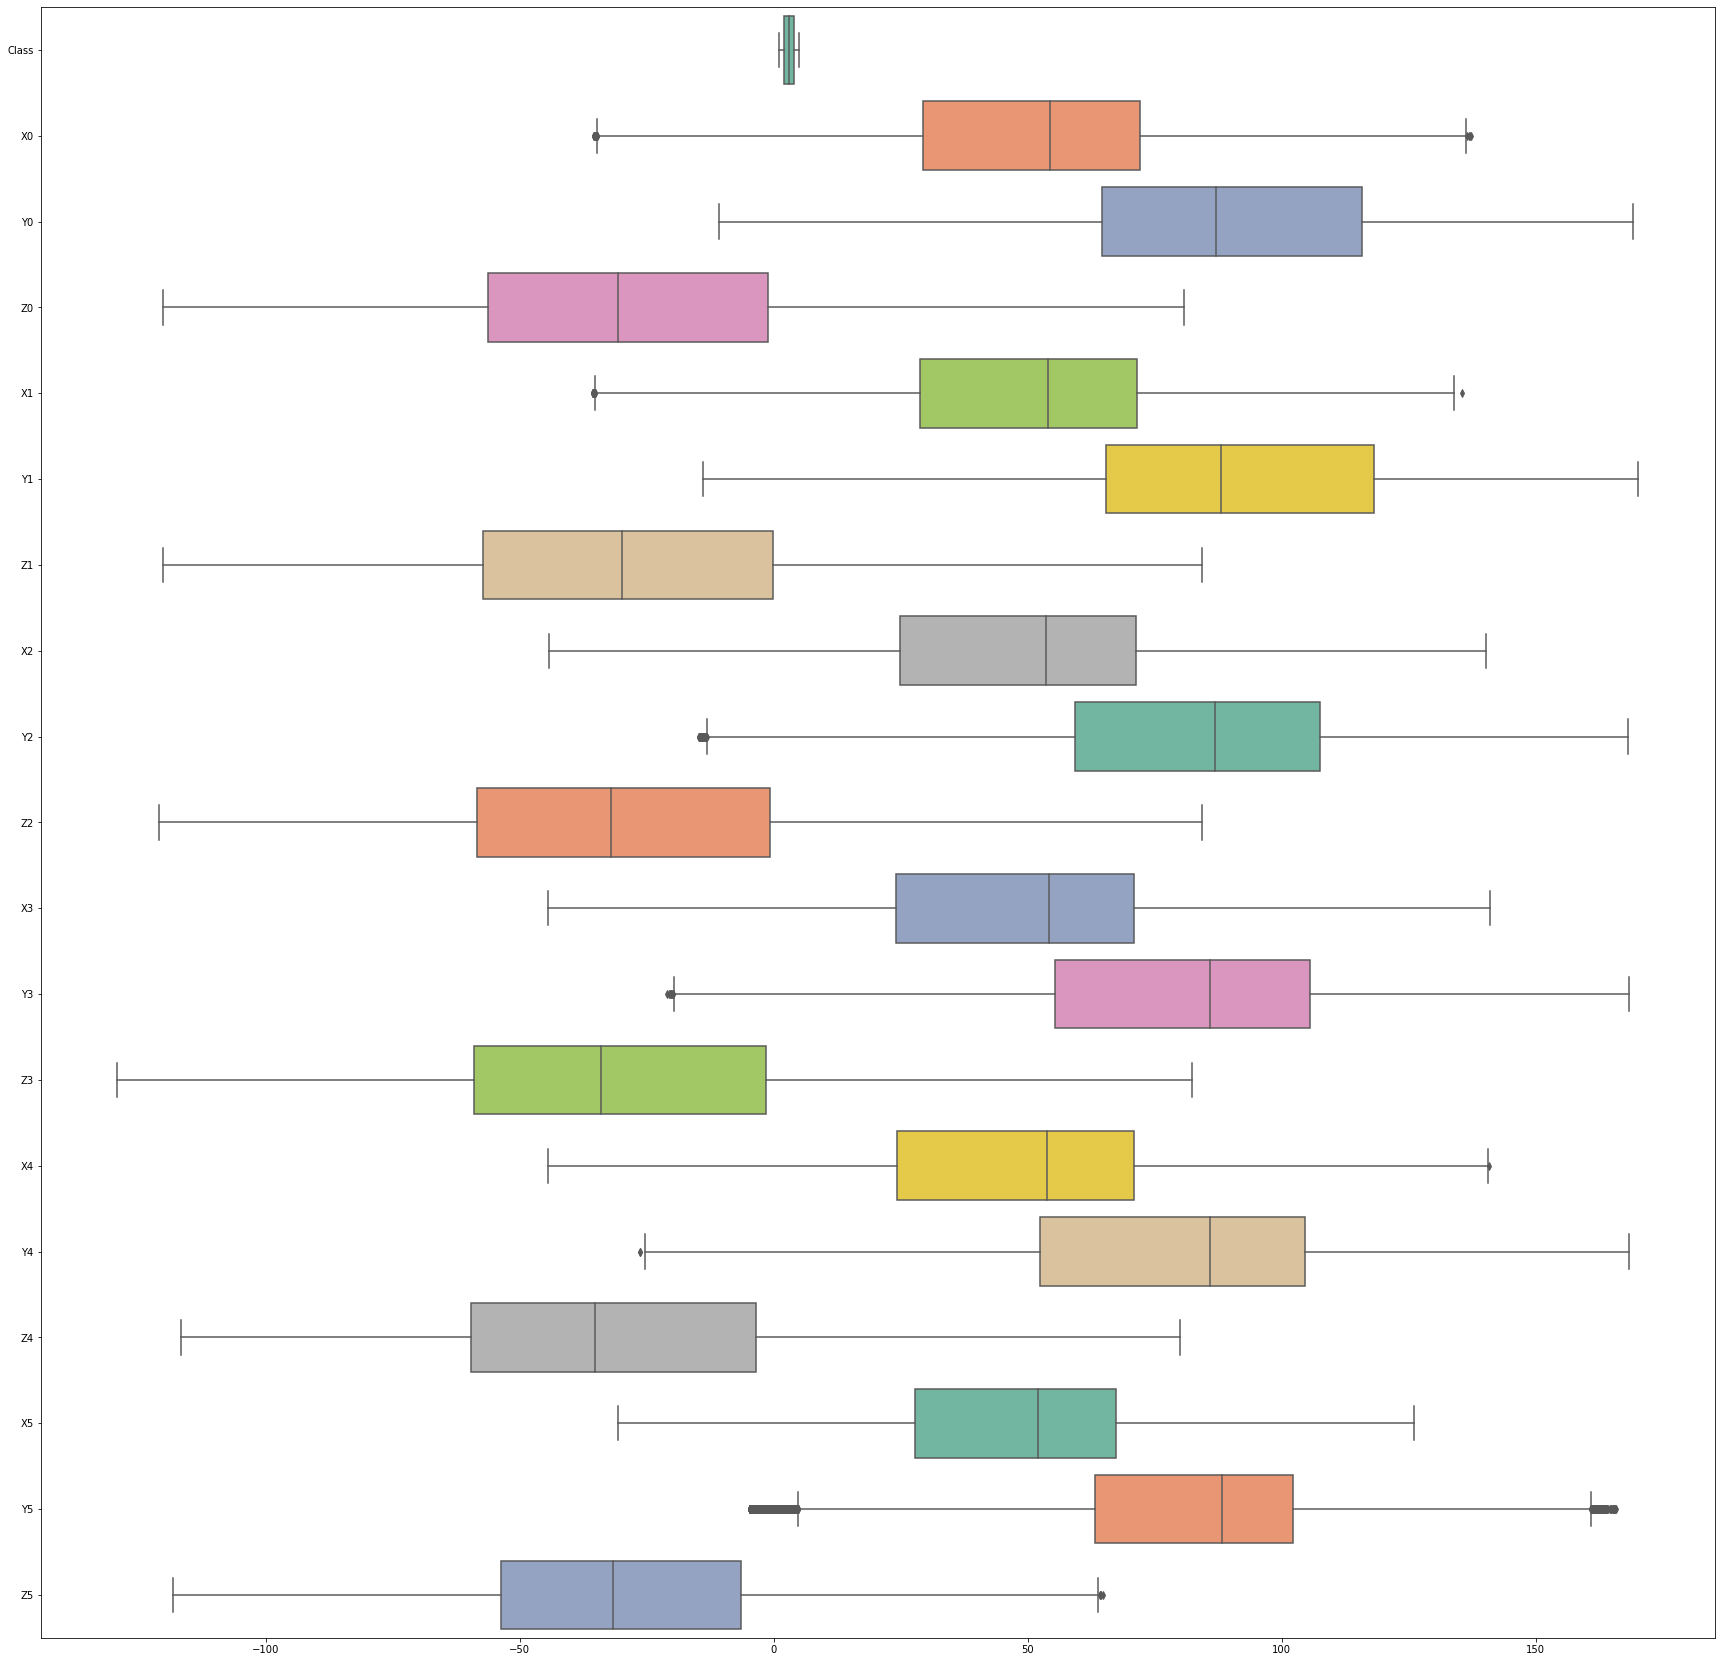

In [26]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df_out, orient="h", palette="Set2")

### It looks like most of the outliers are gone , looks pretty decent

### Lets have a look at clustering relationships between our features
#### I will show subsample of the data since it takes too much time

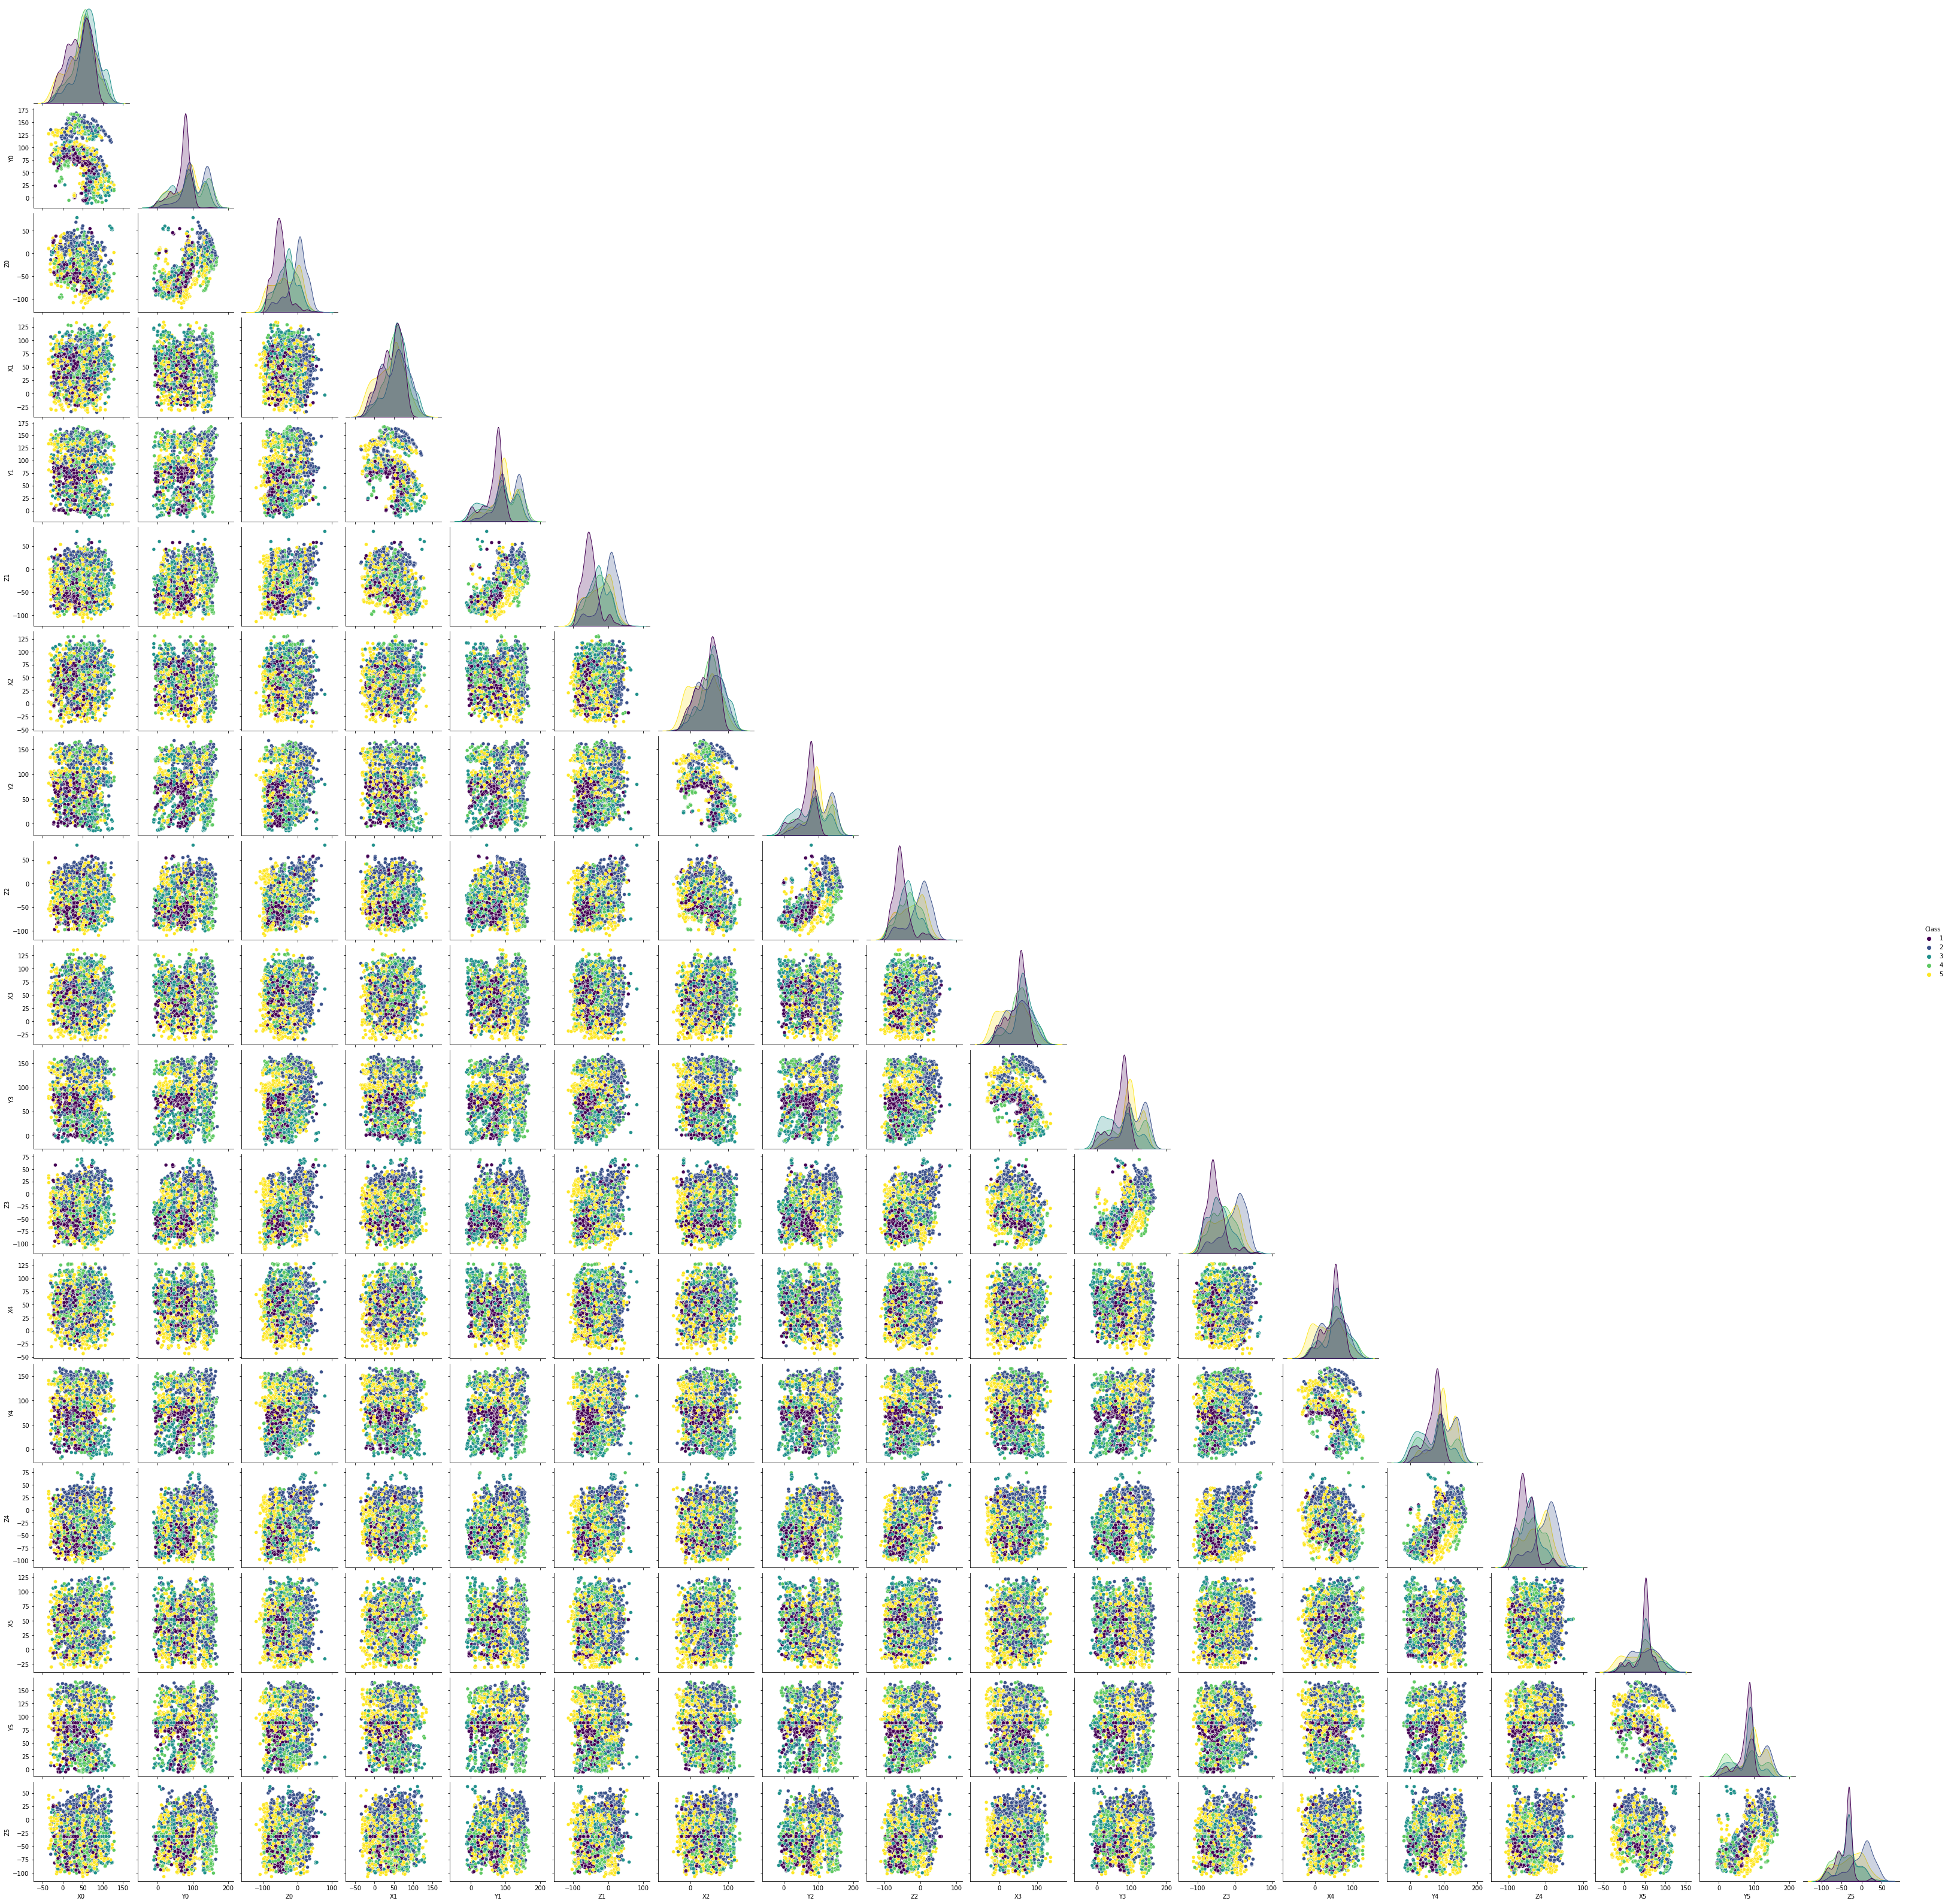

In [27]:
sns.pairplot(df_out.sample(frac=0.05),diag_kind="kde",corner=True,hue="Class",palette="viridis")

### Looks like they have complicated relationships but computers can understand it better so lets move on and try 3 different classification algorithm

# Implementing Methods

### Splitting data

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [29]:
X = df_out[df_out.columns[1:]]
y = df_out["Class"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,shuffle=True)

In [31]:
X_train.shape,y_train.shape

((63830, 18), (63830,))

## 1-) KNN classifier

K-nearest neighbors (KNN) is a lazy learning algorithm, which means that it does not train a model upfront. Instead, it stores the training data and waits until it is asked to make a prediction. When a prediction is requested, the KNN algorithm finds the K nearest data points (i.e. neighbors) in the training data and uses those neighbors to make a prediction.

One of the advantages of the KNN algorithm is that it is simple to understand and implement. It is also relatively fast at making predictions, since it only needs to compare the new data point to the training data and find the K nearest neighbors.

###  Since grid search takes too much time I will use subset of data for this

In [33]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': [3, 5, 7, 9]}  ## choosing odd

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10 , return_train_score=True,verbose=1)

grid_search.fit(X_train[:7500], y_train[:7500])

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, return_train_score=True,
             verbose=1)

In [34]:
# Print the best hyperparameters and the best cross-validation score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 3}
0.7981333333333334


In [35]:
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print("KNN classifier accuracy ",accuracy.round(4))

KNN classifier accuracy  0.8048


### Our accuracy is around 80 percent which is pretty good for classifiying 5 classes.
### Random guess would be around 20 percent
### Lets also see confusion matrix

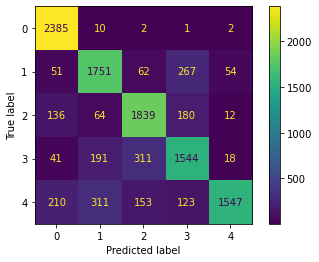

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report


# Generate a confusion matrix
y_pred = best_knn.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_mat)
disp.plot()

###  And also see classification report

In [37]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           1       0.84      0.99      0.91      2400
           2       0.75      0.80      0.78      2185
           3       0.78      0.82      0.80      2231
           4       0.73      0.73      0.73      2105
           5       0.95      0.66      0.78      2344

    accuracy                           0.80     11265
   macro avg       0.81      0.80      0.80     11265
weighted avg       0.81      0.80      0.80     11265



###  We can see we have good precisions over 70 percent and good recall generaly over 70 percent especially class 1 has 0.99 recall which is amazing and class 5 has 0.95 precision

## --------------------------------------------------------------
## 2-) Logistic Regression

### I will again use subset to hyperparameter tune (still it takes some time but it worth)

Logistic regression is a type of supervised learning algorithm that is used for classification tasks. It is a linear model that is trained using maximum likelihood estimation, and it makes predictions by using a sigmoid function to map the predicted output to a probability between 0 and 1.

One of the main differences between logistic regression and KNN is that logistic regression is a parametric model, while KNN is a non-parametric model. This means that logistic regression makes assumptions about the form of the data, while KNN makes no such assumptions. As a result, logistic regression can be more efficient to train, but it may not be as flexible as KNN.

In [38]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [ 0.01, 0.1, 1],
    'penalty': ['l1', 'l2']
}

logistic = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train[:10000],y_train[:10000])

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             return_train_score=True)

In [39]:
# Print the best hyperparameters and the best cross-validation score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'penalty': 'l2'}
0.6809999999999999


In [40]:
best_log = grid_search.best_estimator_
accuracy = best_log.score(X_test, y_test)
print("Logistic regression accuracy ",accuracy.round(4))

Logistic regression accuracy  0.6754


###  Looks like KNN outperformed logistic regression in our data

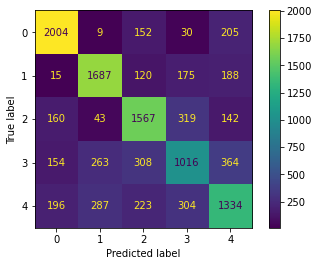

In [41]:
# Generate a confusion matrix
y_pred = best_log.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_mat)
disp.plot()

In [42]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           1       0.79      0.83      0.81      2400
           2       0.74      0.77      0.75      2185
           3       0.66      0.70      0.68      2231
           4       0.55      0.48      0.51      2105
           5       0.60      0.57      0.58      2344

    accuracy                           0.68     11265
   macro avg       0.67      0.67      0.67     11265
weighted avg       0.67      0.68      0.67     11265



### In recall and precision KNN has better results too

### There might be some things why KNN outperformed Logistic regression this much

The data is not linearly separable: Logistic regression is a linear model, which means that it is based on the assumption that the data is linearly separable. If the data is not linearly separable, logistic regression may not be able to fit the data well, and KNN might perform better.

The data has many dimensions: KNN can be more effective when the data has many dimensions, because it does not make any assumptions about the form of the data. Logistic regression can be sensitive to the curse of dimensionality, which means that it can perform poorly when the data has many dimensions.

The data is noisy: KNN can be more robust to noise in the data, because it considers the K nearest neighbors when making a prediction. Logistic regression, on the other hand, is more sensitive to noise, because it only considers a linear combination of the features.

### Data might not be linearly seperable  could be the issue

### So lets use some more advanced technique to deal with non linearly seperable data which is ,
### Support Vector Machine

### 3-) Support Vector Classifier

Support Vector Machines (SVMs) are a type of supervised learning algorithm that can be used for classification or regression tasks. SVMs are based on the idea of finding a hyperplane in an N-dimensional space (where N is the number of features) that maximally separates the data points of different classes.

One advantage of SVMs over Logistic Regression is that they can handle non-linear decision boundaries. This is achieved by using the kernel trick, which projects the data into a higher-dimensional space where it becomes linearly separable.

In [43]:
from sklearn.svm import SVC

param_grid = {'C': [0.01,0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf', 'poly', 'sigmoid']}

model = SVC()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,verbose=1)

grid.fit(X_train[:5000], y_train[:5000])  ## I will use subset because it takes too much time

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [46]:
# Get the best parameters
print(grid.best_params_)

# Get the best score
print(grid.best_score_)

{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}
0.8577999999999999


In [47]:
best_svc = grid.best_estimator_
accuracy = best_svc.score(X_test, y_test)
print("SVC regression accuracy ",accuracy.round(4))

SVC regression accuracy  0.8695


###  Wow looks like we outperformed each model and got almos 87 accuracy which is very well now lets investigate other metrics

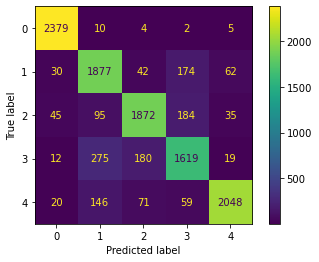

In [48]:
# Generate a confusion matrix
y_pred = best_svc.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_mat)
disp.plot()

In [49]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      2400
           2       0.78      0.86      0.82      2185
           3       0.86      0.84      0.85      2231
           4       0.79      0.77      0.78      2105
           5       0.94      0.87      0.91      2344

    accuracy                           0.87     11265
   macro avg       0.87      0.87      0.87     11265
weighted avg       0.87      0.87      0.87     11265



### We got highest precision in class 5 and highest recall in class 1 as it was in KNN.
### To speak generally our models can classify label "1" very well compared to others. This might be due to the label "1" is more different than others.

### Discussion of Results

#### SVM-KNN comparison

Another advantage of SVMs is that they are effective in high-dimensional spaces, or when there are a lot of features. This is because the optimization problem that they solve is convex, which means that there is only one global minimum.

K-Nearest Neighbors (KNN) is a simple, non-parametric lazy learning algorithm used for classification and regression. It stores all the available cases and classifies a new data point based on the majority vote of its neighbors.

One advantage of KNN is that it is simple to understand and implement. It also has no assumptions about the underlying data distribution, which makes it a good choice for exploratory data analysis.

However, KNN can be computationally expensive because it requires storing the entire training dataset and searching through it for neighbors at prediction time. It is also sensitive to the scale of the features, so it is important to normalize the data before using KNN.

In comparison, SVMs are more computationally efficient and effective in high-dimensional spaces, but they can be more difficult to understand and implement.

#### SVM-Log Reg comparison

One difference between Logistic Regression and SVM is that Logistic Regression is a linear model, while SVM can be used for both linear and non-linear classification. This is because SVM can use the kernel trick to transform the data into a higher-dimensional space, where it becomes linearly separable.

Another difference is that Logistic Regression estimates the probability of a class membership, while SVM finds the hyperplane that maximally separates the classes.

Logistic Regression is easier to implement and interpret, but it is sensitive to the scale of the features and can only handle linear decision boundaries. On the other hand, SVM is more effective in high-dimensional spaces and can handle non-linear decision boundaries, but it is more computationally expensive and difficult to understand and implement.

####  Accuracies :  KNN ,  Logistic Regression ,  Support Vector classifier
#### ------------------                           %80     --------------              %68.5           -----------------------          %86.9

### So to speak generally the main reason logistic regression was failed is because data is probably non linearly seperable because it also performed better in SVC which better at dealing with non linearly sperable data